# Homework 3

Visualizing relationships between variables

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

## Loading 


In [2]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

Wall time: 130 ms


In [3]:
brfss.shape

(100000, 9)

In [4]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [5]:
brfss.describe()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
count,99938.000000,95143.000000,93404.000000,83447.000000,100000.000000,98794.000000,87713.000000,95143.000000,98794.000000
mean,1.513809,170.090443,81.202017,5.788656,2785.881001,6.103296,1.926845,163.915369,47.720732
std,0.499812,10.795080,20.945679,2.229189,3982.612684,3.601652,1.290404,11.297379,18.873769
min,1.000000,91.000000,23.130000,1.000000,5.774036,1.000000,0.000000,90.000000,21.000000
25%,1.000000,163.000000,66.220000,4.000000,579.932564,3.000000,1.140000,160.000000,32.000000
50%,2.000000,170.000000,78.930000,6.000000,1378.138470,6.000000,1.700000,160.000000,47.000000
75%,2.000000,178.000000,90.720000,8.000000,3202.380370,9.000000,2.410000,170.000000,62.000000
max,2.000000,226.000000,272.610000,8.000000,45053.592700,13.000000,15.000000,220.000000,89.500000


## Scatter plot

Scatter plots are a good way to visualize the relationship between two variables, but it is surprising hard to make a good one.

Here's a simple plot of height and weight.

In [6]:
height = brfss['HTM4']
weight = brfss['WTKG3']

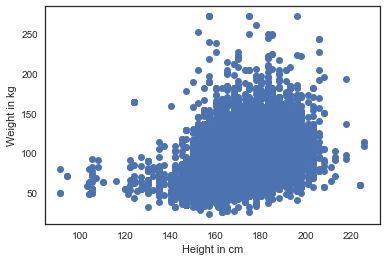

In [7]:
plt.plot(height, weight, 'o')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg');

The center of this plot is saturated, so it is not as dark as it should be, which means the rest of the plot is relatively darker than it should be.  It gives too much visual weight to the outliers and obscures the shape of the relationship.

**Exercise:** Use keywords `alpha` and `markersize` to avoid saturation. 

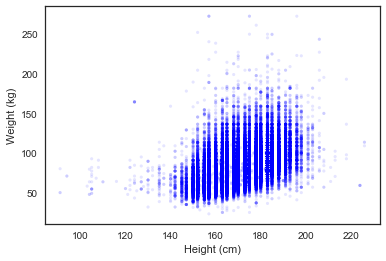

In [8]:
thinkplot.Scatter(height, weight, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 legend=False)

Even after using the alpha and markersize keywords, the scatter plot still looks like a large blob. I can't really tell if height and weight have a linear relationship. However, I do observe that height and weight are discretized probably due to rounding. 

With transparency and smaller markers, you will be able to see that height and weight are discretized.

**Exercise:** Use `np.random.normal` to add enough noise to height and weight so the vertical lines in the scatter plot are blurred out.  Create variables named `height_jitter` and `weight_jitter`.

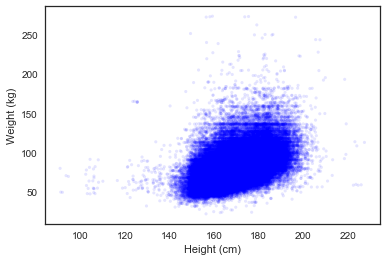

In [9]:
# Heights rounded off to the nearest inch (2.8 cm) so add random
# values between -1.4 to 1.4
height_jitter = thinkstats2.Jitter(height, 1.4)
weight_jitter = thinkstats2.Jitter(weight, 0.5)
thinkplot.Scatter(height_jitter, weight_jitter, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 legend=False)

After adding the random noise, the blob looks more blurry, which indicates that it is no longer discretized. 

## Linear regression

We can use `scipy.stats` to find the linear least squares fit to weight as a function of height.

In [10]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']

res = linregress(xs, ys)
res

LinregressResult(slope=0.9192115381848303, intercept=-75.12704250330242, rvalue=0.47420308979024656, pvalue=0.0, stderr=0.0056328637698029906)

The `LinregressResult` object contains the estimated parameters and a few other statistics.

We can use the estimated `slope` and `intercept` to plot the line of best fit.

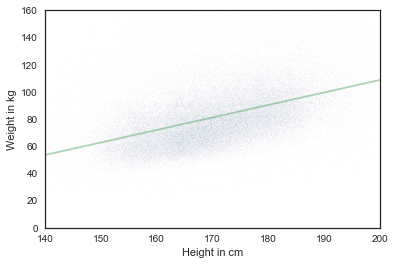

In [11]:
# jitter the data
height_jitter = height + np.random.normal(0, 2, size=len(height))
weight_jitter = weight + np.random.normal(0, 2, size=len(weight))

# make the scatter plot
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])

# plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)

# label the axes
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160]);

## Weight and age

**Exercise:** Make a scatter plot of weight and age.  The variable `AGE` is discretized in 5-year intervals, so you might want to jitter it.  

Adjust transparency and marker size to generate the best view of the relationship.

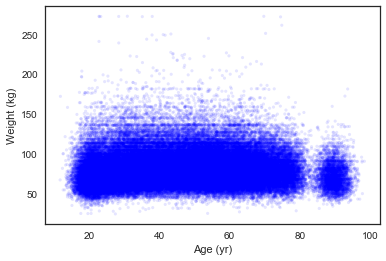

In [12]:
age = brfss['AGE']
weight_jitter = thinkstats2.Jitter(weight, 0.5)
age_jitter = thinkstats2.Jitter(age, 2.5)
thinkplot.Scatter(age_jitter, weight_jitter, alpha=0.1, s=10)
thinkplot.Config(xlabel='Age (yr)',
                 ylabel='Weight (kg)',
                 legend=False)

I used 2.5 to jitter the ages since the age variable is discretized into 5-year intervals. This scatter plot looks really flat. There doesn't seem to be any positive or negative relationship between age and weight.  

**Exercise:** Use `linregress` to estimate the slope and intercept of the line of best fit for this data.

Note: as in the previous example, use `dropna` to drop rows that contain NaN for either variable, and use the resulting subset to compute the arguments for `linregress`.

In [13]:
subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']

res = linregress(xs, ys)
res

LinregressResult(slope=0.023981159566968748, intercept=80.07977583683224, rvalue=0.02164143288906408, pvalue=4.374327493007456e-11, stderr=0.0036381394107421875)

**Exercise:** Generate a plot that shows the estimated line and a scatter plot of the data.

QUESTION: can I use that jittering method for scatter plot generation?

ANSWER: jitter the data, 2 gives range of randomness (Gaussian), recommended to use uniform for scatter plots

Text(0, 0.5, 'Weight in kg')

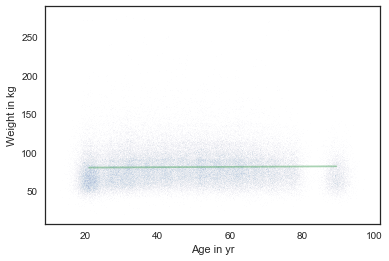

In [14]:
age_jitter = age + np.random.normal(0, 2, size=len(age))
weight_jitter = weight + np.random.normal(0, 2, size=len(weight))

# make the scatter plot
plt.plot(age_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

# plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)

# label the axes
plt.xlabel('Age in yr')
plt.ylabel('Weight in kg')

The fitted linear least squares line for age and weight matches with the scatter plot in that it has a slope close to 0.  

## Box and violin plots

The Seaborn package, which is usually imported as `sns`, provides two functions used to show the distribution of one variable as a function of another variable.

The following box plot shows the distribution of weight in each age category.  [Read the documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html) so you know what it means.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


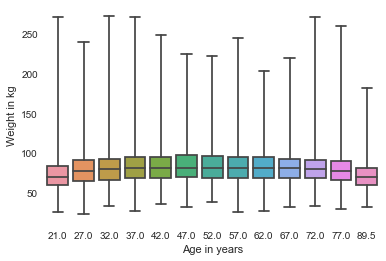

In [15]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg');

This figure makes the shape of the relationship clearer; average weight increases between ages 20 and 50, and then decreases.

A violin plot is another way to show the same thing.  Again, [read the documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html) so you know what it means.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


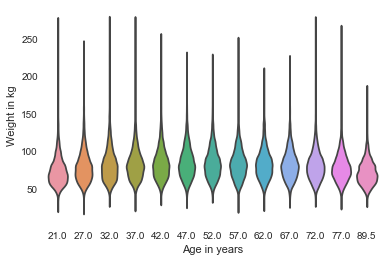

In [16]:
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg');

**Exercise:** Make a box plot that shows the distribution of weight as a function of income.  The variable `INCOME2` contains income codes with 8 levels.

Use `dropna` to select the rows with valid income and weight information.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


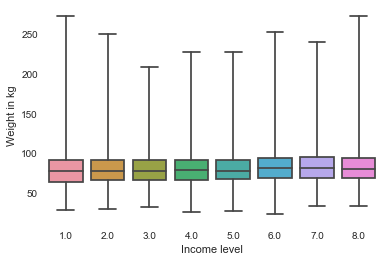

In [17]:
data = brfss.dropna(subset=['WTKG3', 'INCOME2'])

sns.boxplot(x='INCOME2', y='WTKG3', data=data, whis=10)

sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Weight in kg');

The median of weight between the difference income levels all look very similar to each other. The IQR is also consistent across income levels. The minimums looks leveled, while the maximums looks slightly quadratic. From this box plot, I would conclude that income level and weight are not related. 

**Exercise:** Make a violin plot with the same variables.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


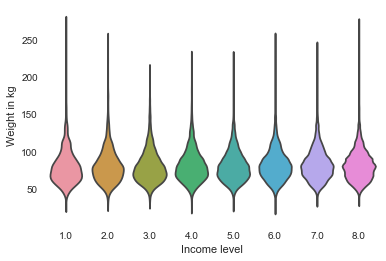

In [18]:
sns.violinplot(x='INCOME2', y='WTKG3', data=data, inner=None)

sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Weight in kg');

The violin plot shows basically the same things as the box plot above. Personally, I prefer the violin plots since they provide a little bit more information about the distribution of weights in the IQR. 

## Plotting percentiles

One more way to show the relationship between two variables is to break one variables into groups and plot percentiles of the other variable across groups.

As a starting place, here's the median weight in each age group.

In [19]:
grouped = brfss.groupby('AGE') # groupby unique age values

for name, group in grouped['WTKG3']:
    print(name, group.median())

21.0 70.31
27.0 77.11
32.0 79.38
37.0 80.74
42.0 81.65
47.0 81.65
52.0 81.65
57.0 81.65
62.0 81.65
67.0 80.74
72.0 79.38
77.0 77.11
89.5 70.08


To get the other percentiles, we can use a `Cdf`.

In [20]:
ps = [95, 75, 50, 25, 5]

for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).Percentiles(ps)
    print(name, percentiles)

21.0 [108.86  83.91  70.31  59.87  49.9 ]
27.0 [117.93  90.72  77.11  65.    52.62]
32.0 [122.47  92.99  79.38  65.77  54.43]
37.0 [122.47  94.35  80.74  68.04  56.25]
42.0 [122.47  95.25  81.65  68.04  55.34]
47.0 [124.74  97.52  81.65  69.4   55.79]
52.0 [123.38  96.62  81.65  68.95  55.79]
57.0 [117.93  95.25  81.65  68.49  54.43]
62.0 [122.47  95.25  81.65  68.04  54.43]
67.0 [117.93  92.99  80.74  68.04  54.43]
72.0 [113.4   90.72  79.38  68.04  53.52]
77.0 [111.13  89.81  77.11  65.77  52.16]
89.5 [99.79 81.65 69.85 59.87 49.44]


Now I'll collect those results in a list of arrays:

In [21]:
res = []
for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).Percentiles(ps)
    res.append(percentiles)
    
res

[array([108.86,  83.91,  70.31,  59.87,  49.9 ]),
 array([117.93,  90.72,  77.11,  65.  ,  52.62]),
 array([122.47,  92.99,  79.38,  65.77,  54.43]),
 array([122.47,  94.35,  80.74,  68.04,  56.25]),
 array([122.47,  95.25,  81.65,  68.04,  55.34]),
 array([124.74,  97.52,  81.65,  69.4 ,  55.79]),
 array([123.38,  96.62,  81.65,  68.95,  55.79]),
 array([117.93,  95.25,  81.65,  68.49,  54.43]),
 array([122.47,  95.25,  81.65,  68.04,  54.43]),
 array([117.93,  92.99,  80.74,  68.04,  54.43]),
 array([113.4 ,  90.72,  79.38,  68.04,  53.52]),
 array([111.13,  89.81,  77.11,  65.77,  52.16]),
 array([99.79, 81.65, 69.85, 59.87, 49.44])]

To get the age groups, we can extract the "keys" from the groupby object.

In [22]:
xs = grouped.groups.keys()
xs

dict_keys([21.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 72.0, 77.0, 89.5])

Now, we want to loop through the columns of the list of arrays; to do that, we want to transpose it.

In [23]:
rows = np.transpose(res)
rows

array([[108.86, 117.93, 122.47, 122.47, 122.47, 124.74, 123.38, 117.93,
        122.47, 117.93, 113.4 , 111.13,  99.79],
       [ 83.91,  90.72,  92.99,  94.35,  95.25,  97.52,  96.62,  95.25,
         95.25,  92.99,  90.72,  89.81,  81.65],
       [ 70.31,  77.11,  79.38,  80.74,  81.65,  81.65,  81.65,  81.65,
         81.65,  80.74,  79.38,  77.11,  69.85],
       [ 59.87,  65.  ,  65.77,  68.04,  68.04,  69.4 ,  68.95,  68.49,
         68.04,  68.04,  68.04,  65.77,  59.87],
       [ 49.9 ,  52.62,  54.43,  56.25,  55.34,  55.79,  55.79,  54.43,
         54.43,  54.43,  53.52,  52.16,  49.44]])

Now we can plot the percentiles across the groups.

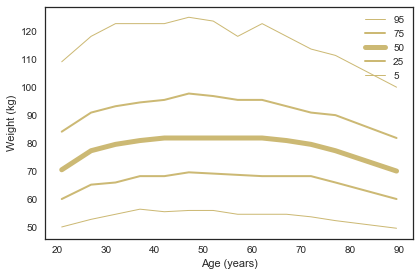

In [24]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C4')
    
decorate(xlabel='Age (years)',
         ylabel='Weight (kg)')

In my opinion, this plot shows the shape of the relationship most clearly.

## Discretizing variables

Box plot, violin plots, and percentile line plots don't work as well if the number of groups on the x-axis is too big.  For example, here's a box plot of weight versus height.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


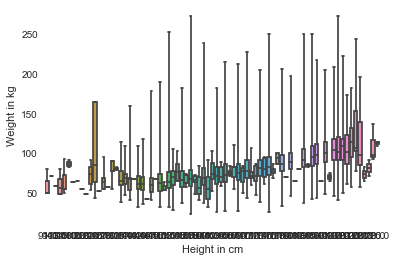

In [25]:
sns.boxplot(x='HTM4', y='WTKG3', data=data, whis=10)

sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg');

This would look better and mean more if there were fewer height groups.  We can use `pd.cut` to put people into height groups where each group spans 10 cm.

In [26]:
bins = np.arange(0, height.max(), 10)
brfss['_HTMG10'] = pd.cut(brfss['HTM4'], bins=bins, labels=bins[:-1]).astype(float)

Now here's what the plot looks like.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


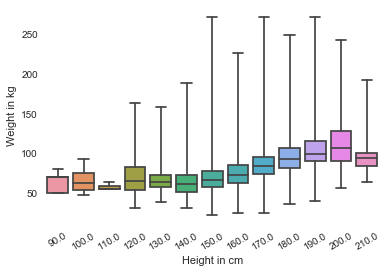

In [27]:
sns.boxplot(x='_HTMG10', y='WTKG3', data=brfss, whis=10)
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg');

**Exercise:** Plot percentiles of weight versus these height groups.

In [28]:
grouped = brfss.groupby('_HTMG10')

for name, group in grouped['WTKG3']:
    print(name, group.median())

90.0 70.76
100.0 63.5
110.0 55.0
120.0 65.77
130.0 64.41
140.0 61.23
150.0 66.22
160.0 72.57
170.0 83.91
180.0 92.99
190.0 99.79
200.0 106.59
210.0 93.89


In [29]:
ps = [95, 75, 50, 25, 5]

for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).Percentiles(ps)
    print(name, percentiles)

90.0 [80.   70.76 70.76 49.9  49.9 ]
100.0 [90.72 77.11 63.5  54.43 47.63]
110.0 [64. 64. 55. 55. 55.]
120.0 [164.2   83.46  65.77  54.43  47.63]
130.0 [95.25 72.57 63.96 57.61 43.09]
140.0 [90.72 72.57 61.23 52.16 43.09]
150.0 [99.79 77.56 66.22 57.61 48.08]
160.0 [113.4   86.18  72.57  63.5   54.43]
170.0 [119.29  95.25  83.91  74.84  62.6 ]
180.0 [131.54 106.59  92.99  81.65  68.04]
190.0 [145.15 115.67  99.79  90.26  74.39]
200.0 [172.37 129.27 106.59  90.72  68.04]
210.0 [192.78 102.06  92.53  81.65  63.96]


In [30]:
res = []
for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).Percentiles(ps)
    res.append(percentiles)
    
res

[array([80.  , 70.76, 70.76, 49.9 , 49.9 ]),
 array([90.72, 77.11, 63.5 , 54.43, 47.63]),
 array([64., 64., 55., 55., 55.]),
 array([164.2 ,  83.46,  65.77,  54.43,  47.63]),
 array([95.25, 72.57, 63.96, 57.61, 43.09]),
 array([90.72, 72.57, 61.23, 52.16, 43.09]),
 array([99.79, 77.56, 66.22, 57.61, 48.08]),
 array([113.4 ,  86.18,  72.57,  63.5 ,  54.43]),
 array([119.29,  95.25,  83.91,  74.84,  62.6 ]),
 array([131.54, 106.59,  92.99,  81.65,  68.04]),
 array([145.15, 115.67,  99.79,  90.26,  74.39]),
 array([172.37, 129.27, 106.59,  90.72,  68.04]),
 array([192.78, 102.06,  92.53,  81.65,  63.96])]

In [31]:
xs = grouped.groups.keys()
print(xs)
print('\n')
rows = np.transpose(res)
print(rows)

dict_keys([90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0])


[[ 80.    90.72  64.   164.2   95.25  90.72  99.79 113.4  119.29 131.54
  145.15 172.37 192.78]
 [ 70.76  77.11  64.    83.46  72.57  72.57  77.56  86.18  95.25 106.59
  115.67 129.27 102.06]
 [ 70.76  63.5   55.    65.77  63.96  61.23  66.22  72.57  83.91  92.99
   99.79 106.59  92.53]
 [ 49.9   54.43  55.    54.43  57.61  52.16  57.61  63.5   74.84  81.65
   90.26  90.72  81.65]
 [ 49.9   47.63  55.    47.63  43.09  43.09  48.08  54.43  62.6   68.04
   74.39  68.04  63.96]]


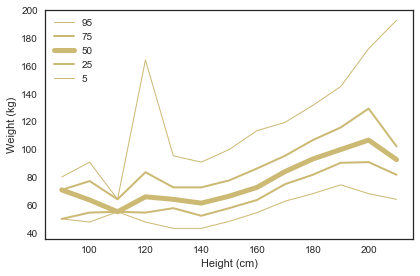

In [32]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C4')
    
decorate(xlabel='Height (cm)',
         ylabel='Weight (kg)')

The graph of percentiles of weight versus height groups clearly shows the relationship between height and weight. From 140 to 200 cm, there appears to be a positive (maybe linear) relationship between height and weight. Above 200 cm, the relationship becomes negative (true for all percentiles except for the heaviest people). Below 140 cm, the relationship starts to fluctuate more intensely. It is interesting how the graphed weight percentiles all spike at around 100 cm and 120 cm.

## Vegetables

**Exercise:** The variable `_VEGESU1` contains the self-reported number of serving of vegetables each respondent eats per day.  Explore relationships between this variable and the others variables in the dataset, and design visualizations that show any relationship you find as clearly as possible.

First I will begin by creating scatter plots for all of possible relationships between vegetable servings (ys) and (1) height, (2) weight, (3) age, and (4) income.

In [58]:
# Get all of the data
heights = brfss['HTM4']
weights = brfss['WTKG3']
veggies = brfss['_VEGESU1']
ages = brfss['AGE']
incomes = brfss['INCOME2']

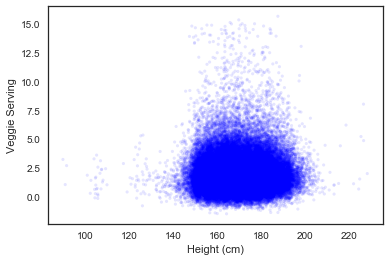

In [62]:
# Veggie servings versus heights
heights_jitter = thinkstats2.Jitter(heights, 1.4)
veggies_jitter = thinkstats2.Jitter(veggies, 0.5)

thinkplot.Scatter(heights_jitter, veggies_jitter, alpha=0.1, s=10)

thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Veggie Serving',
                 legend=False)

Scatter plot looks mainly concentrated in a certain region. A few people also eat a ton more veggies compared to everyone else. 

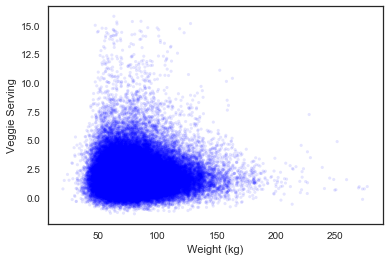

In [64]:
# Veggie servings versus weights
weights_jitter = thinkstats2.Jitter(weights, 0.5)
veggies_jitter = thinkstats2.Jitter(veggies, 0.5)

thinkplot.Scatter(weight_jitter, veggies_jitter, alpha=0.1, s=10)

thinkplot.Config(xlabel='Weight (kg)',
                 ylabel='Veggie Serving',
                 legend=False)

Scatter plot has interesting curved blob shape, which may indicate a relationship between weight and veggies. 

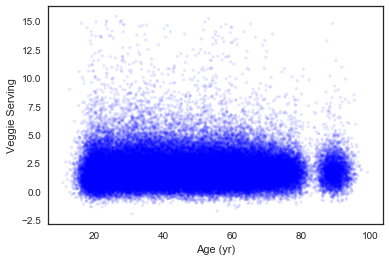

In [65]:
# Veggie servings versus ages
ages_jitter = thinkstats2.Jitter(ages, 2.5)
veggies_jitter = thinkstats2.Jitter(veggies, 0.5)

thinkplot.Scatter(ages_jitter, veggies_jitter, alpha=0.1, s=10)

thinkplot.Config(xlabel='Age (yr)',
                 ylabel='Veggie Serving',
                 legend=False)

Scatter plot looks really flat. There doesn't seem to be any positive or negative relationship between age and veggie servings. Though there is an interesting break at around 80 years.  

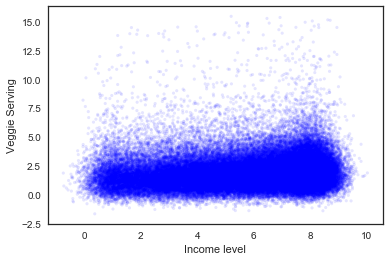

In [66]:
# Veggie servings versus incomes
incomes_jitter = thinkstats2.Jitter(incomes, 0.5)
veggies_jitter = thinkstats2.Jitter(veggies, 0.5)

thinkplot.Scatter(incomes_jitter, veggies_jitter, alpha=0.1, s=10)

thinkplot.Config(xlabel='Income level',
                 ylabel='Veggie Serving',
                 legend=False)

Scatter plot has a really interesting upward curvature, which may indicate a positive relationship between income level and veggie servings. 

All of the scatter plots have at least one interesting aspect to them, so I will create box plots for each one. 

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


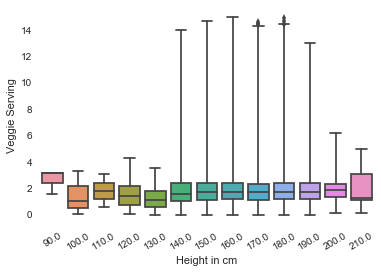

In [71]:
# Box plots for veggie servings versus heights
bins = np.arange(0, heights.max(), 10)
brfss['_HTMG10'] = pd.cut(brfss['HTM4'], bins=bins, labels=bins[:-1]).astype(float)

sns.boxplot(x='_HTMG10', y='_VEGESU1', data=brfss, whis=10)
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Veggie Serving');

Looking at the box plot, it seems like the distribution of veggie servings between heights of 140 cm to 200 cm stays relatively constant. There is interesting oscillatory behavior occuring at lower heights.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


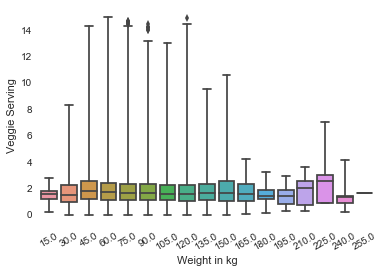

In [75]:
# Box plots for veggie servings versus weights
bins = np.arange(0, weights.max(), 15)
brfss['_WTKG15'] = pd.cut(brfss['WTKG3'], bins=bins, labels=bins[:-1]).astype(float)

sns.boxplot(x='_WTKG15', y='_VEGESU1', data=brfss, whis=10)
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Weight in kg')
plt.ylabel('Veggie Serving');

Looking at the box plot, it seems like the distribution of veggies serving medians between weights of 45 kg and 180 kg stays pretty constant. The maximum shows a nice decrease as the weights increase. There is a slightly upward curve between weights of 180 kg and 225 kg. 

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


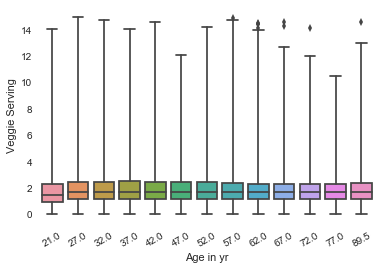

In [76]:
# Box plots for veggie servings versus age
data = brfss.dropna(subset=['_VEGESU1', 'AGE'])

sns.boxplot(x='AGE', y='_VEGESU1', data=data, whis=10)
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in yr')
plt.ylabel('Veggie Serving');

Looking at the box plot, the distribution of veggie servings between different age groups is pretty constant. 

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


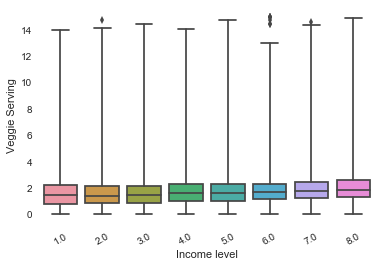

In [77]:
# Box plots for veggie servings versus income
data = brfss.dropna(subset=['_VEGESU1', 'INCOME2'])

sns.boxplot(x='INCOME2', y='_VEGESU1', data=data, whis=10)
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Veggie Serving');

Looking at the box plot, the distribution of veggie servings between different income levels is also pretty constant.

After doing the box plots, I decided to focus on veggie servings versus weights. For a final visualization I will plot the percentiles of veggie servings versus the different weight groups. 

In [78]:
grouped = brfss.groupby('_WTKG15')

for name, group in grouped['_VEGESU1']:
    print(name, group.median())

15.0 1.56
30.0 1.46
45.0 1.81
60.0 1.71
75.0 1.65
90.0 1.67
105.0 1.5950000000000002
120.0 1.57
135.0 1.6150000000000002
150.0 1.63
165.0 1.59
180.0 1.43
195.0 1.3900000000000001
210.0 2.0300000000000002
225.0 2.57
240.0 1.3
255.0 1.6


In [79]:
ps = [95, 75, 50, 25, 5]

for name, group in grouped['_VEGESU1']:
    percentiles = Cdf(group).Percentiles(ps)
    print(name, percentiles)

15.0 [2.74 1.56 1.56 0.59 0.17]
30.0 [4.03 2.28 1.46 0.92 0.32]
45.0 [4.29 2.57 1.81 1.17 0.42]
60.0 [4.17 2.43 1.71 1.14 0.43]
75.0 [4.15 2.34 1.65 1.14 0.43]
90.0 [4.04 2.3  1.67 1.14 0.46]
105.0 [4.   2.28 1.59 1.13 0.42]
120.0 [3.86 2.28 1.57 1.03 0.44]
135.0 [4.14 2.28 1.61 1.11 0.37]
150.0 [4.29 2.58 1.63 1.04 0.3 ]
165.0 [3.   2.31 1.59 1.   0.29]
180.0 [2.72 1.89 1.43 1.15 0.64]
195.0 [2.83 1.86 1.37 0.71 0.3 ]
210.0 [3.6  2.5  2.   0.64 0.29]
225.0 [7.   3.03 2.57 0.86 0.85]
240.0 [4.14 1.43 1.3  0.89 0.19]
255.0 [1.6 1.6 1.6 1.6 1.6]


In [80]:
res = []
for name, group in grouped['_VEGESU1']:
    percentiles = Cdf(group).Percentiles(ps)
    res.append(percentiles)
    
res

[array([2.74, 1.56, 1.56, 0.59, 0.17]),
 array([4.03, 2.28, 1.46, 0.92, 0.32]),
 array([4.29, 2.57, 1.81, 1.17, 0.42]),
 array([4.17, 2.43, 1.71, 1.14, 0.43]),
 array([4.15, 2.34, 1.65, 1.14, 0.43]),
 array([4.04, 2.3 , 1.67, 1.14, 0.46]),
 array([4.  , 2.28, 1.59, 1.13, 0.42]),
 array([3.86, 2.28, 1.57, 1.03, 0.44]),
 array([4.14, 2.28, 1.61, 1.11, 0.37]),
 array([4.29, 2.58, 1.63, 1.04, 0.3 ]),
 array([3.  , 2.31, 1.59, 1.  , 0.29]),
 array([2.72, 1.89, 1.43, 1.15, 0.64]),
 array([2.83, 1.86, 1.37, 0.71, 0.3 ]),
 array([3.6 , 2.5 , 2.  , 0.64, 0.29]),
 array([7.  , 3.03, 2.57, 0.86, 0.85]),
 array([4.14, 1.43, 1.3 , 0.89, 0.19]),
 array([1.6, 1.6, 1.6, 1.6, 1.6])]

In [81]:
xs = grouped.groups.keys()
print(xs)
print('\n')
rows = np.transpose(res)
print(rows)

dict_keys([15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120.0, 135.0, 150.0, 165.0, 180.0, 195.0, 210.0, 225.0, 240.0, 255.0])


[[2.74 4.03 4.29 4.17 4.15 4.04 4.   3.86 4.14 4.29 3.   2.72 2.83 3.6
  7.   4.14 1.6 ]
 [1.56 2.28 2.57 2.43 2.34 2.3  2.28 2.28 2.28 2.58 2.31 1.89 1.86 2.5
  3.03 1.43 1.6 ]
 [1.56 1.46 1.81 1.71 1.65 1.67 1.59 1.57 1.61 1.63 1.59 1.43 1.37 2.
  2.57 1.3  1.6 ]
 [0.59 0.92 1.17 1.14 1.14 1.14 1.13 1.03 1.11 1.04 1.   1.15 0.71 0.64
  0.86 0.89 1.6 ]
 [0.17 0.32 0.42 0.43 0.43 0.46 0.42 0.44 0.37 0.3  0.29 0.64 0.3  0.29
  0.85 0.19 1.6 ]]


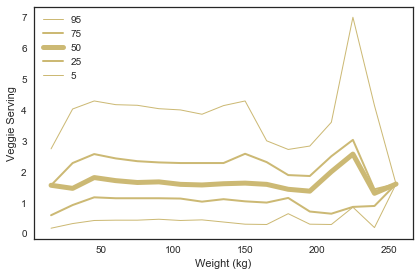

In [82]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C4')
    
decorate(xlabel='Weight (kg)',
         ylabel='Veggie Serving')

The graph of percentiles of veggie servings versus weight groups has a really interesting relationship that is supported by the box plot. From 50 kg to 150 kg, there appears to be a constant relationship between veggie servings and weight (neither positive nor negative). Above 150 kg, there is a slightly happy face (upward curving parabola) relationship. It is interesting how the veggie serving percentiles all spike at around 225 kg. Another smaller spike occurs at around 150 kg.

## Correlation

One way to compute correlations is the Pandas method `corr`, which returns a correlation matrix.

In [36]:
subset = brfss[['HTM4', 'WTKG3', 'AGE']]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


**Exercise:** Compute a correlation matrix for age, income, and vegetable servings.

In [37]:
subset = brfss[['AGE', 'INCOME2', '_VEGESU1']]
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


## Correlation calibration

To calibrate your sense of correlation, let's look at scatter plots for fake data with different values of `rho`.

The following function generates random normally-distributed data with approximately the given coefficient of correlation. 

In [38]:
def gen_corr(rho):
    means = [0, 0]
    covs = [[1, rho], [rho, 1]]
    m = np.random.multivariate_normal(means, covs, 100)
    return np.transpose(m)

This function makes a scatter plot and shows the actual value of `rho`.

In [39]:
def plot_scatter(rho, seed=1):
    np.random.seed(seed)
    xs, ys = gen_corr(rho)
    rho = np.corrcoef(xs, ys)[0][1]

    plt.plot(xs, ys, 'o', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    ax = plt.gca()
    label_rho(ax, rho)
    
    return xs, ys

In [40]:
def label_rho(ax, rho):
    label = 'ρ = %0.2f' % rho
    plt.text(0.05, 0.95, label, 
             horizontalalignment='left', 
             verticalalignment='top', 
             transform=ax.transAxes,
             fontsize=12)

The following plots show what scatter plots look like with different values of `rho`.

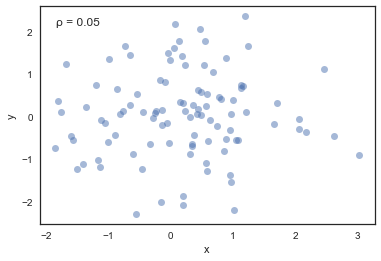

In [41]:
res = []
xs, ys = plot_scatter(0, seed=18)
res.append((xs, ys))

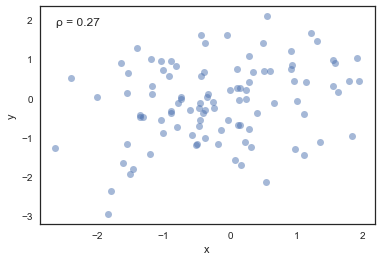

In [42]:
xs, ys = plot_scatter(0.25, seed=18)
res.append((xs, ys))

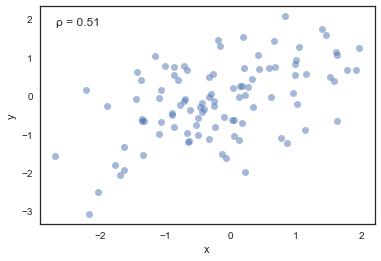

In [43]:
xs, ys = plot_scatter(0.5, seed=18)
res.append((xs, ys))

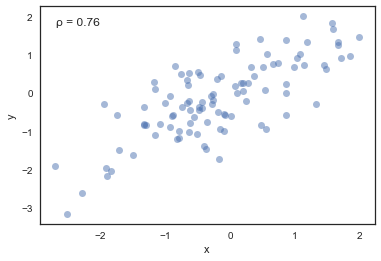

In [44]:
xs, ys = plot_scatter(0.75, seed=18)
res.append((xs, ys))

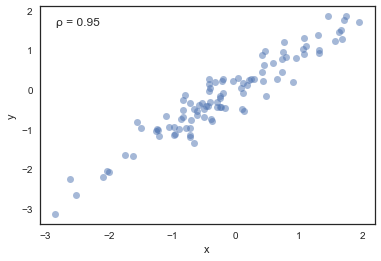

In [45]:
xs, ys = plot_scatter(0.95, seed=18)
res.append((xs, ys))

Here are all the plots side-by-side for comparison.

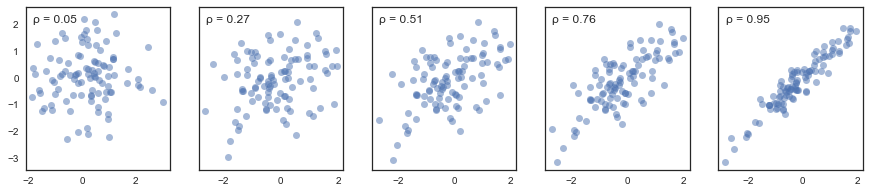

In [46]:
fig, axes = plt.subplots(ncols=5, sharey=True, figsize=(15,3)) 

for ax, (xs, ys) in zip(axes, res):
    ax.plot(xs, ys, 'o', alpha=0.5)
    rho = np.corrcoef(xs, ys)[0][1]
    label_rho(ax, rho)

## Nonlinear relationships

Here an example that generates fake data with a nonlinear relationship.

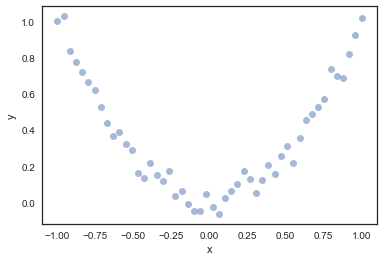

In [47]:
np.random.seed(18)
xs = np.linspace(-1, 1)
ys = xs**2 + np.random.normal(0, 0.05, len(xs))

plt.plot(xs, ys, 'o', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y');

This relationship is quite strong, in the sense that we can make a much better guess about `y` if we know `x` than if we don't.

But if we compute correlations, they don't show the relationship.

In [48]:
df = pd.DataFrame(dict(xs=xs, ys=ys))
df.corr(method='pearson')

,xs,ys
xs,1.000000,-0.011014
ys,-0.011014,1.000000


In [49]:
df.corr(method='spearman')

,xs,ys
xs,1.000000,-0.005234
ys,-0.005234,1.000000


In [50]:
df.corr(method='kendall')

,xs,ys
xs,1.000000,0.004082
ys,0.004082,1.000000


## Correlation strength

Here are two fake datasets showing hypothetical relationships between weight and age.

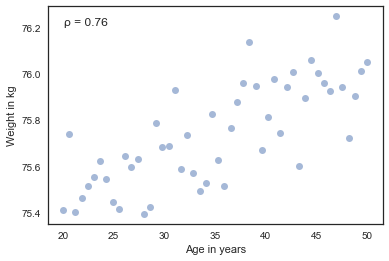

In [51]:
np.random.seed(18)
xs = np.linspace(20, 50)
ys1 = 75 + 0.02 * xs + np.random.normal(0, 0.15, len(xs))

plt.plot(xs, ys1, 'o', alpha=0.5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

rho = np.corrcoef(xs, ys1)[0][1]
label_rho(plt.gca(), rho)

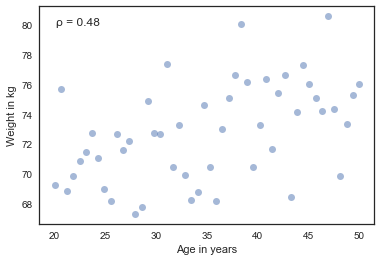

In [52]:
np.random.seed(18)
xs = np.linspace(20, 50)
ys2 = 65 + 0.2 * xs + np.random.normal(0, 3, len(xs))

plt.plot(xs, ys2, 'o', alpha=0.5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

rho = np.corrcoef(xs, ys2)[0][1]
label_rho(plt.gca(), rho)

Which relationship is stronger?

It depends on what we mean.  Clearly, the first one has a higher coefficient of correlation.  In that world, knowing someone's age would allow you to make a better guess about their weight.

But look more closely at the y-axis in the two plots.  How much weight do people gain per year in each of these hypothetical worlds?

In [53]:
from scipy.stats import linregress
        
res = linregress(xs, ys1)
res

LinregressResult(slope=0.018821034903244386, intercept=75.08049023710964, rvalue=0.7579660563439402, pvalue=1.8470158725246148e-10, stderr=0.002337849260560818)

In [54]:
res = linregress(xs, ys2)
res

LinregressResult(slope=0.17642069806488855, intercept=66.60980474219305, rvalue=0.47827769765763173, pvalue=0.0004430600283776241, stderr=0.04675698521121631)

In fact, the slope for the second data set is almost 10 times higher.

The following figures show the same data again, this time with the line of best fit and the estimated slope.

In [55]:
def label_slope(ax, slope):
    label = 'm = %0.3f' % slope
    plt.text(0.05, 0.95, label, 
             horizontalalignment='left', 
             verticalalignment='top', 
             transform=ax.transAxes,
             fontsize=12)

(75.35118093219263, 76.29172584257574)

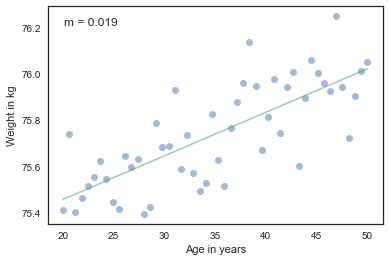

In [56]:
res = linregress(xs, ys1)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(xs, ys1, 'o', alpha=0.5)
plt.plot(fx, fy, '-', alpha=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
label_slope(plt.gca(), res.slope)

plt.gca().get_ylim()

(66.62157782752605, 81.25696583110674)

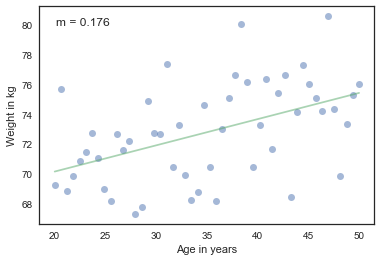

In [57]:
res = linregress(xs, ys2)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(xs, ys2, 'o', alpha=0.5)
plt.plot(fx, fy, '-', alpha=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
label_slope(plt.gca(), res.slope)

plt.gca().get_ylim()

The difference is not obvious from looking at the figure; you have to look carefully at the y-axis labels and the estimated slope.

And you have to interpret the slope in context.  In the first case, people gain about 0.019 kg per year, which works out to less than half a pound per decade.  In the second case, they gain almost 4 pounds per decade.

But remember that in the first case, the coefficient of correlation is substantially higher.

**Exercise:** So, in which case is the relationship "stronger"?  Write a sentence or two below to summarize your thoughts.

It is important to highlight that the coefficient of correlation does not imply anything about the slope. All it does is indicate whether two variables have a linear relationship. If the correlation is high, then there is a linear relationship. In the first case, the correlation coefficient is higher indicating that with a given age, I can make a better approximation for the corresponding weight. However, the slope argument is a valid one! I think it depends on the definition of **strength**. If strength means that I want a higher predictability rate, then I would say that the first case is stronger. If strength means that I want a bigger change, then I would say that the second case is stronger. 

If I am writting a research paper, I would probably go with the first case since correlation coefficients are standardly used to indicate the strength of a relationship. 